In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv('flights.csv')
df

,Airline,Flight Number,Departure City,Arrival City,Departure Date,Return Date,Price,Stops,Duration,Departure Time,Arrival Time
0,American,AA 1299,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 19:30,NaN,295,0,71,2024-11-23 19:30,2024-11-23 20:41
1,American,AA 1228,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 20:35,NaN,295,0,73,2024-11-23 20:35,2024-11-23 21:48
2,United,UA 6321,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,2024-11-23 19:34,NaN,304,1,66,2024-11-23 19:34,2024-11-23 20:40
3,United,UA 6116,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,2024-11-23 21:37,NaN,304,1,83,2024-11-23 21:37,2024-11-23 23:00
4,American,AA 2434,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 15:20,NaN,369,0,70,2024-11-23 15:20,2024-11-23 16:30
...,...,...,...,...,...,...,...,...,...,...,...
819,Delta,DL 5765,John F. Kennedy International Airport,Boston Logan International Airport,2025-02-27 06:00,NaN,267,0,90,2025-02-27 06:00,2025-02-27 07:30
820,Delta,DL 5733,John F. Kennedy International Airport,Boston Logan International Airport,2025-02-27 09:50,NaN,302,0,80,2025-02-27 09:50,2025-02-27 11:10
821,Delta,DL 5813,John F. Kennedy International Airport,Boston Logan International Airport,2025-02-27 14:30,NaN,302,0,84,2025-02-27 14:30,2025-02-27 15:54
822,Delta,DL 2639,John F. Kennedy International Airport,Boston Logan International Airport,2025-02-27 21:00,NaN,302,0,87,2025-02-27 21:00,2025-02-27 22:27


In [27]:
df.Airline.value_counts()
df['Departure City'].value_counts()

Departure City
San Francisco International Airport                             129
Dallas Fort Worth International Airport                          96
Chicago O'Hare International Airport                             85
Los Angeles International Airport                                84
John F. Kennedy International Airport                            81
Miami International Airport                                      70
Denver International Airport                                     64
Seattle Tacoma International Airport                             61
Hartsfield-Jackson Atlanta International Airport                 52
Boston Logan International Airport                               51
Austin-Bergstrom International Airport                           12
George Bush Intercontinental Airport                             11
Charlotte Douglas International Airport                           6
Phoenix Sky Harbor International Airport                          5
Salt Lake City International Airp

In [28]:
df.replace('N/A', np.nan, inplace=True)
df.isnull().sum()
df.drop(columns=['Flight Number', 'Return Date'], inplace=True, errors='ignore')
df.head()


,Airline,Departure City,Arrival City,Departure Date,Price,Stops,Duration,Departure Time,Arrival Time
0,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 19:30,295,0,71,2024-11-23 19:30,2024-11-23 20:41
1,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 20:35,295,0,73,2024-11-23 20:35,2024-11-23 21:48
2,United,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,2024-11-23 19:34,304,1,66,2024-11-23 19:34,2024-11-23 20:40
3,United,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,2024-11-23 21:37,304,1,83,2024-11-23 21:37,2024-11-23 23:00
4,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,2024-11-23 15:20,369,0,70,2024-11-23 15:20,2024-11-23 16:30


In [29]:
# ensure both price and duration are numerical values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [30]:
import pandas as pd
from datetime import datetime

# Define the time categorization function
def get_time_of_day(time_str):
    time = datetime.strptime(time_str, "%Y-%m-%d %H:%M")
    hour = time.hour
    
    if 0 <= hour < 7:
        return "early morning"
    elif 7 <= hour < 12:
        return "morning"
    elif 12 <= hour < 17:
        return "afternoon"
    elif 17 <= hour < 20:
        return "evening"
    else:
        return "night"

# Load the preprocessed dataset
df = pd.read_csv('flights.csv')

# Apply the time categorization function to both Departure and Arrival times
df['Departure Time of Day'] = df['Departure Date'].apply(lambda x: get_time_of_day(x) if pd.notnull(x) else 'N/A')
df['Arrival Time of Day'] = df['Arrival Time'].apply(lambda x: get_time_of_day(x) if pd.notnull(x) else 'N/A')

# Drop the old time columns if not needed
df.drop(columns=['Departure Date', 'Arrival Time'], inplace=True, errors='ignore')

# Save the updated DataFrame
df.to_csv('flights_updated.csv', index=False)

# Display the updated DataFrame
df.head()


,Airline,Flight Number,Departure City,Arrival City,Return Date,Price,Stops,Duration,Departure Time,Departure Time of Day,Arrival Time of Day
0,American,AA 1299,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,295,0,71,2024-11-23 19:30,evening,night
1,American,AA 1228,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,295,0,73,2024-11-23 20:35,night,night
2,United,UA 6321,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,NaN,304,1,66,2024-11-23 19:34,evening,night
3,United,UA 6116,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,NaN,304,1,83,2024-11-23 21:37,night,night
4,American,AA 2434,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,NaN,369,0,70,2024-11-23 15:20,afternoon,afternoon


In [31]:
# use one-hot encoding for categorical variables like Airline and departure/arrival cities
df_encoded = pd.get_dummies(df, columns=['Airline', 'Departure City', 'Arrival City'])

print(df_encoded.head())

  Flight Number  Return Date  Price  Stops  Duration    Departure Time  \
0       AA 1299          NaN    295      0        71  2024-11-23 19:30   
1       AA 1228          NaN    295      0        73  2024-11-23 20:35   
2       UA 6321          NaN    304      1        66  2024-11-23 19:34   
3       UA 6116          NaN    304      1        83  2024-11-23 21:37   
4       AA 2434          NaN    369      0        70  2024-11-23 15:20   

  Departure Time of Day Arrival Time of Day  Airline_Alaska  Airline_American  \
0               evening               night           False              True   
1                 night               night           False              True   
2               evening               night           False             False   
3                 night               night           False             False   
4             afternoon           afternoon           False              True   

   ...  Arrival City_Miami International Airport  \
0  ...          

In [32]:

from sklearn.preprocessing import MinMaxScaler

if 'Departure Date' in df.columns:
    df['Departure Hour'] = pd.to_datetime(df['Departure Date'], errors='coerce').dt.hour
if 'Arrival Time' in df.columns:
    df['Arrival Hour'] = pd.to_datetime(df['Arrival Time'], errors='coerce').dt.hour

df.drop(columns=['Departure Time', 'Arrival Time', 'Departure Date', 'Return Date', 'Flight Number'], inplace=True, errors='ignore')

columns_to_normalize = ['Price', 'Total Duration', 'Departure Hour', 'Arrival Hour', 'Stops', 'Duration']

columns_to_normalize = [col for col in columns_to_normalize if col in df.columns and df[col].dtype in ['int64', 'float64']]


# normalize numerical columns for standardized data
scaler = MinMaxScaler()

# pick columns to normalize

# fit and transform data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df.head()


,Airline,Departure City,Arrival City,Price,Stops,Duration,Departure Time of Day,Arrival Time of Day
0,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,0.088990,0.0,0.013812,evening,night
1,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,0.088990,0.0,0.019337,night,night
2,United,Austin-Bergstrom International Airport,George Bush Intercontinental Airport,0.094124,1.0,0.000000,evening,night
3,United,George Bush Intercontinental Airport,Dallas Fort Worth International Airport,0.094124,1.0,0.046961,night,night
4,American,Austin-Bergstrom International Airport,Dallas Fort Worth International Airport,0.131204,0.0,0.011050,afternoon,afternoon


In [33]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
print(df.head())
#encode airline and cities
df['Airline'] = label_encoder.fit_transform(df['Airline'])
df['Departure City'] = label_encoder.fit_transform(df['Departure City'])
df['Arrival City'] = label_encoder.fit_transform(df['Arrival City'])

print(df.head())
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# x is all features except price and y is target feature price
X = df.drop(columns=['Price'])
y = df['Price']
print(X.dtypes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create neural network with dense layers 
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Increase neurons   model.add(Dense(64, activation='relu'))  # Add more layers
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2)

y_pred_nn = model.predict(X_test)
# evaluate error metrics from test and predicted data
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - Mean Squared Error: {mse_nn:.2f}, R2 Score: {r2_nn:.2f}")





    Airline                          Departure City  \
0  American  Austin-Bergstrom International Airport   
1  American  Austin-Bergstrom International Airport   
2    United  Austin-Bergstrom International Airport   
3    United    George Bush Intercontinental Airport   
4  American  Austin-Bergstrom International Airport   

                              Arrival City     Price  Stops  Duration  \
0  Dallas Fort Worth International Airport  0.088990    0.0  0.013812   
1  Dallas Fort Worth International Airport  0.088990    0.0  0.019337   
2     George Bush Intercontinental Airport  0.094124    1.0  0.000000   
3  Dallas Fort Worth International Airport  0.094124    1.0  0.046961   
4  Dallas Fort Worth International Airport  0.131204    0.0  0.011050   

  Departure Time of Day Arrival Time of Day  
0               evening               night  
1                 night               night  
2               evening               night  
3                 night               night  


c:\Users\tpran\OneDrive\Documents\personal_projects\dyanmic-flight-pricing\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: could not convert string to float: 'afternoon'

In [10]:
print(df.head())

   Airline  Departure City  Arrival City     Price  Stops  Duration  \
0        1               0             6  0.088990    0.0  0.013812   
1        1               0             6  0.088990    0.0  0.019337   
2        6               0            10  0.094124    1.0  0.000000   
3        6              10             6  0.094124    1.0  0.046961   
4        1               0             6  0.131204    0.0  0.011050   

   Departure Hour  Arrival Hour  Total Duration  
0              19            20        0.005571  
1              20            21        0.011142  
2              19            20        0.158774  
3              21            23        0.206128  
4              15            16        0.002786  


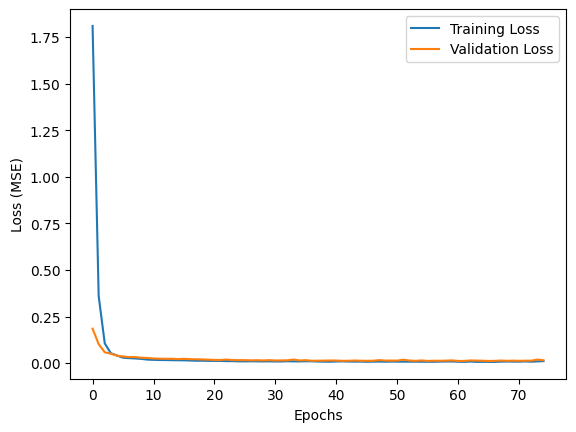

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()